# Distribuciones en forma de anillos

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append( [d*cos(a), d*sin(a)])
    return np.array(data)

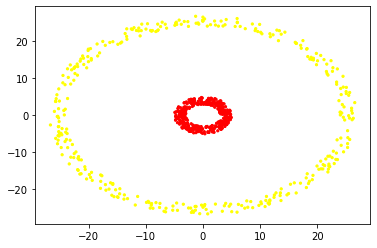

In [7]:
data1 = ring(3, 5)
data2 = ring(24,27)

data = np.concatenate( [data1, data2], axis=0) ## se juntan verticalmente con el axis=0
labels = np.concatenate([  [0 for i in range(len(data1))], [1 for i in range(len(data2))]  ]) 
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap="autumn")

## Algoritmo con K-Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(2).fit(data)

In [8]:
clust = km.predict(data)

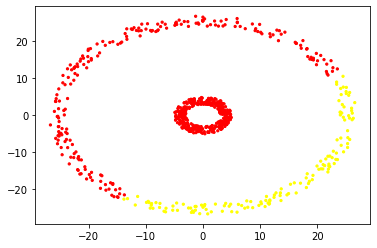

In [9]:
plt.scatter(data[:,0], data[:,1], c = clust, s=5, cmap="autumn")

# Algoritmo de los K-Medoids

## Se deben instalar las librerias:
* pyclust
* treelib

# Diferencia entre k-means y k-medoids:
* K-means crea un centroide virtual para el cluster seleccionado
* K-medoids selecciona uno de los datos reales para que se convierta en el representativo del cluster

In [14]:
from pyclust import KMedoids

In [15]:
kmed = KMedoids(2).fit_predict(data)

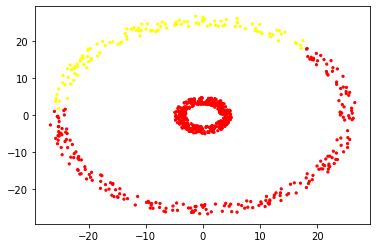

In [16]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

## Algoritmo del Clustering Espectral

In [17]:
from sklearn.cluster import SpectralClustering

In [18]:
clust = SpectralClustering(2).fit_predict(data)

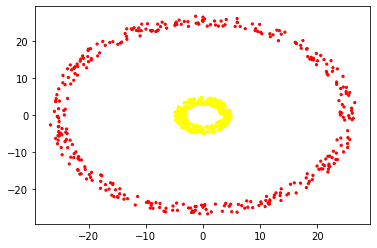

In [19]:
plt.scatter(data[:,0], data[:,1], c= clust, s=5, cmap="autumn")

## Resumen:

* Podemos estimar la k?
    * No: Propagación de la afinidad
    * Si: ¿Podemos usar la distancia euclidea?
        * Si: K-means
        * No: ¿Podemos buscar valores centrales?
            * Si: K-Medoids
            * No: ¿Los datos son linealmente separables?
                * Si: Clustering Aglomerativo o Jerárquico (dendrograma)
                * No: Clustering Espectral